### Python Dependencies

#### Importing the required python dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

### Data Collection

#### Importing and Loading the dataset from the local repository

In [2]:
data = pd.read_csv(r'..\dataset\emotion_dataset.txt',sep=';',names=['statement','emotion'])     # Adding the names of the columns manually as column names were not present while importing

#### Displaying random 20 records of the dataset

In [3]:
data.sample(20)

,statement,emotion
6672,i tend to feel a bit cranky when i ve gone for...,anger
15204,i look at the feelings which i think have in s...,sadness
12958,i probably should have written this closer to ...,joy
7433,i really hate this feeling when you really giv...,anger
6715,i really feel that when people consistently ma...,sadness
18455,i feel ugly i cover myself with a beautiful bl...,sadness
16987,i somehow feel glad shes now in malacca with m...,joy
8399,i feel like i should have something more intel...,joy
888,i feel bothered,anger
14070,i can barely maintain long distance relationsh...,sadness


#### Displaying the total number of rows and columns present inside the dataset

In [4]:
print(f"Total number of rows present inside the dataset : {data.shape[0]}")
print(f"Total number of columns present inside the dataset : {data.shape[1]}")

Total number of rows present inside the dataset : 20000
Total number of columns present inside the dataset : 2


### Exploratory Data Analysis

#### Displaying the complete information about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  20000 non-null  object
 1   emotion    20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


#### Displaying the complete statistical information about the dataset

In [6]:
data.describe(include='all')

,statement,emotion
count,20000,20000
unique,19948,6
top,i will feel as though i am accepted by as well...,joy
freq,2,6761


#### Calculating the number of null values present inside the dataset

In [7]:
data.isnull().sum()

statement    0
emotion      0
dtype: int64

#### Calculating the number of duplicates present inside the dataset

In [8]:
data.duplicated().sum()

1

#### Removing the duplicate values present inside the dataset

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

#### Displaying the value counts of each emotion

In [10]:
data['emotion'].value_counts()

emotion
joy         6760
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64

### Data Visualization

#### Plotting the countplot for different types of emotions

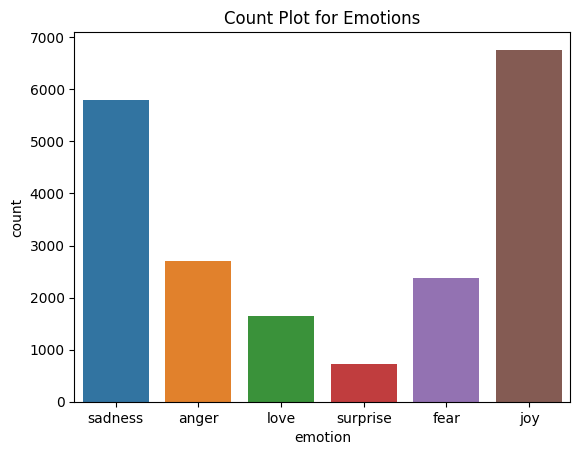

In [11]:
sns.countplot(data=data,x='emotion',hue='emotion')
plt.title('Count Plot for Emotions')
plt.show()

#### Plotting the countplot of emotions in decreasing order

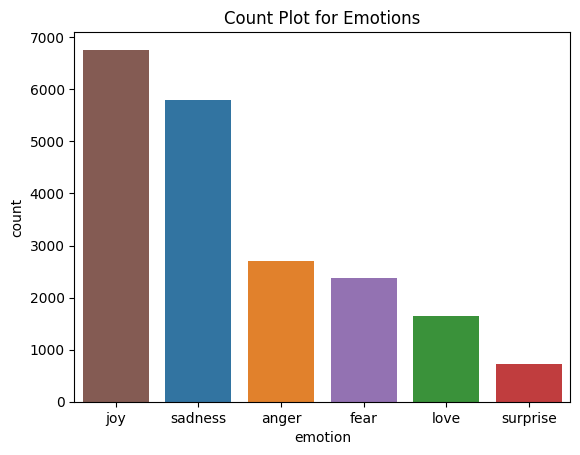

In [12]:
emotion_counts = data['emotion'].value_counts()
sorted_emotions = emotion_counts.index

sns.countplot(data=data,x='emotion',order=sorted_emotions,hue='emotion')
plt.title('Count Plot for Emotions')
plt.show()

The above two graphs provide an insight that the joy emotional texts are maximum number in the dataset while the surprise emotional texts are minimum in number

### Feature Engineering

#### Splitting the dataset into X-part and Y-part

In [13]:
x = data['statement']
y = data['emotion']

#### Converting the X-part and Y-part into training and testing sets

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Displaying the shape of training as well as testing sets

In [15]:
print(f"X-Train Shape : {x_train.shape}")
print(f"Y-Train Shape : {y_train.shape}")
print(f"X-Test Shape : {x_test.shape}")
print(f"Y-Test Shape : {y_test.shape}")

X-Train Shape : (15999,)
Y-Train Shape : (15999,)
X-Test Shape : (4000,)
Y-Test Shape : (4000,)


### Model Training

#### Creating a pipeline for Count Vectorizer and Logistic Regression

In [16]:
pipe_lor = Pipeline(steps=[
    ('cv', CountVectorizer()),  # Step 1: CountVectorizer
    ('lr', LogisticRegression())  # Step 2: Logistic Regression
])

#### Training the model with the training data

In [17]:
pipe_lor.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

#### Saving the training sets as well as testing sets

In [18]:
trained_data = pd.DataFrame()
trained_data['statement'] = x_train
trained_data['y_train'] = y_train
trained_data.to_csv(r'..\dataset\training_dataset.csv',index=False)

In [19]:
tested_data = pd.DataFrame()
tested_data['statement'] = x_test
tested_data['emotion'] = y_test
tested_data.to_csv(r'..\dataset\testing_dataset.csv',index=False)

#### Saving the model

In [20]:
with open('..\\models\\Text-Emotion-Classifier.pkl','wb') as model_file :
    pickle.dump(pipe_lor,model_file)

In [21]:
pipe_lor.score(x_test,y_test)

0.89825